In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
from pprint import pprint


Bad key "text.kerning_factor" on line 4 in
C:\Users\jayan\Anaconda\envs\tf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
%matplotlib inline
sns.set_style("darkgrid")

### Importing Dataset

In [4]:
happy=pd.read_csv('happy.csv')
angry=pd.read_csv('angry.csv')
sad=pd.read_csv('sad.csv')
disgust=pd.read_csv('disgust.csv')
fear=pd.read_csv('fear.csv')
surprise=pd.read_csv('surprise.csv')
contempt=pd.read_csv('contempt.csv')


### Normalization

In [24]:
happy_nor = happy / happy.max().max()
angry_nor = angry / angry.max().max()
sad_nor = sad / sad.max().max()
disgust_nor = disgust / disgust.max().max()
fear_nor = fear / fear.max().max()
surprise_nor = surprise / surprise.max().max()
contempt_nor = contempt / contempt.max().max()

### Density Distribution

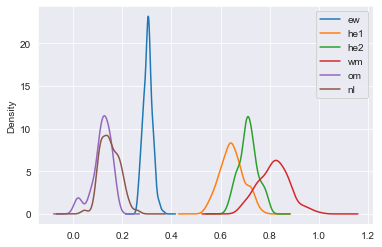

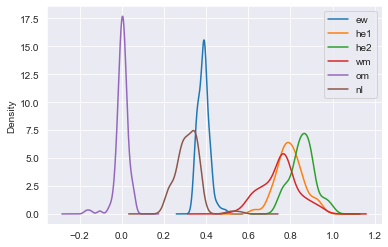

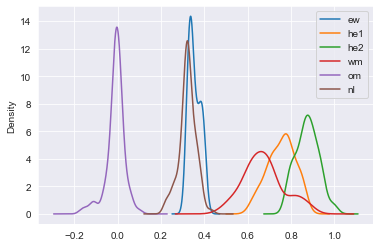

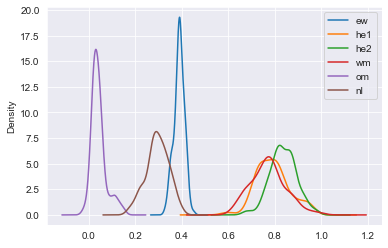

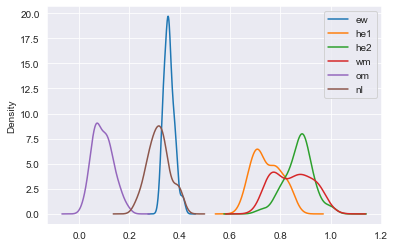

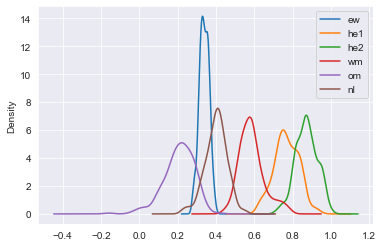

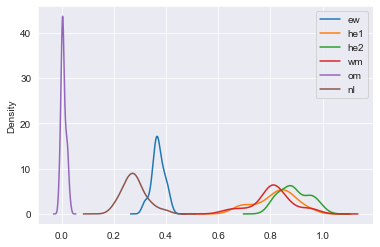

In [27]:
happy_nor.plot.kde()
angry_nor.plot.kde()
sad_nor.plot.kde()
disgust_nor.plot.kde()
fear_nor.plot.kde()
surprise_nor.plot.kde()
contempt_nor.plot.kde()

### Box plot

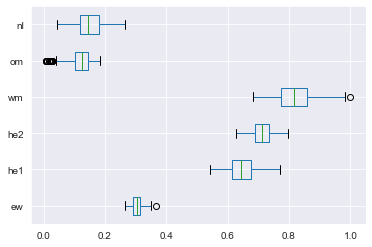

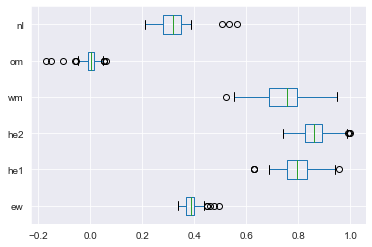

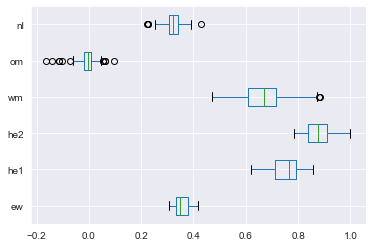

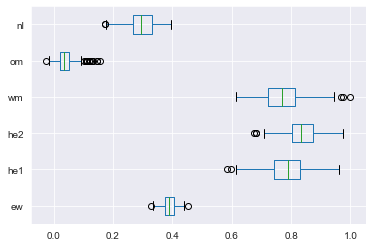

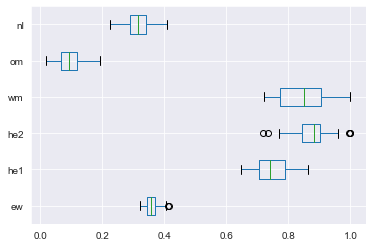

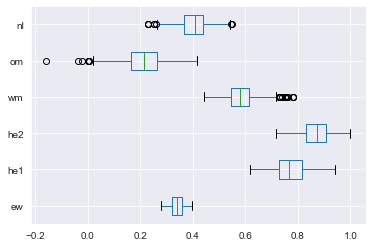

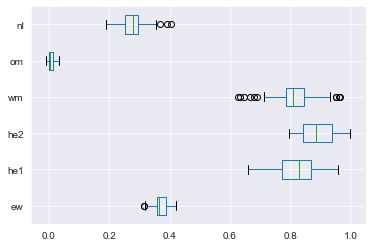

In [29]:
happy_nor.plot.box(vert=False)
angry_nor.plot.box(vert=False)
sad_nor.plot.box(vert=False)
disgust_nor.plot.box(vert=False)
fear_nor.plot.box(vert=False)
surprise_nor.plot.box(vert=False)
contempt_nor.plot.box(vert=False)

### Data Frame

In [50]:
happy['expr']='happy'
angry['expr']='angry'
sad['expr']='sad'
disgust['expr']='disgust'
fear['expr']='fear'
surprise['expr']='surprise'
contempt['expr']='contempt'


df=happy.append(surprise,ignore_index = True).append(sad,ignore_index = True)
df

,ew,he1,he2,wm,om,nl,expr
0,81.5,182.0,194.0,206.0,40.0,28.0,happy
1,80.0,180.5,193.5,204.0,38.0,25.0,happy
2,81.0,180.5,190.0,207.0,38.0,23.5,happy
3,71.0,155.0,165.0,203.0,26.0,36.5,happy
4,72.0,157.5,166.0,206.0,27.0,36.0,happy
...,...,...,...,...,...,...,...
534,81.0,169.5,200.5,153.0,-10.0,67.5,sad
535,83.0,175.5,203.0,152.0,-11.0,65.5,sad
536,75.0,133.0,185.0,144.0,0.0,83.0,sad
537,73.0,132.5,183.5,143.0,0.0,79.0,sad


### Spliting Data into train and test

In [51]:
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

In [52]:
train_test_split(df, test_size=0.2)

(       ew    he1    he2     wm    om    nl   expr
 0    81.5  182.0  194.0  206.0  40.0  28.0  happy
 1    80.0  180.5  193.5  204.0  38.0  25.0  happy
 2    81.0  180.5  190.0  207.0  38.0  23.5  happy
 3    71.0  155.0  165.0  203.0  26.0  36.5  happy
 4    72.0  157.5  166.0  206.0  27.0  36.0  happy
 ..    ...    ...    ...    ...   ...   ...    ...
 534  81.0  169.5  200.5  153.0 -10.0  67.5    sad
 535  83.0  175.5  203.0  152.0 -11.0  65.5    sad
 536  75.0  133.0  185.0  144.0   0.0  83.0    sad
 537  73.0  132.5  183.5  143.0   0.0  79.0    sad
 538  76.5  137.0  187.5  155.0   1.0  81.5    sad
 
 [431 rows x 7 columns],
        ew    he1    he2     wm    om    nl      expr
 400  64.0  156.5  183.0  105.0  68.0  90.0  surprise
 238  68.0  144.0  163.0  119.0  57.0  95.0  surprise
 512  74.5  152.5  175.5  152.0   7.0  69.0       sad
 112  75.5  154.0  168.5  210.0  26.0  35.0     happy
 209  78.5  198.5  208.0  125.0   6.0  70.0  surprise
 ..    ...    ...    ...    ...   ...

In [53]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [54]:
data = train_df.values
data[:5]

array([[81.5, 182.0, 194.0, 206.0, 40.0, 28.0, 'happy'],
       [80.0, 180.5, 193.5, 204.0, 38.0, 25.0, 'happy'],
       [81.0, 180.5, 190.0, 207.0, 38.0, 23.5, 'happy'],
       [71.0, 155.0, 165.0, 203.0, 26.0, 36.5, 'happy'],
       [72.0, 157.5, 166.0, 206.0, 27.0, 36.0, 'happy']], dtype=object)

### Data pure?

In [59]:
def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)
    #print(unique_classes)

    if len(unique_classes) == 1:
        return True
    else:
        return False

In [60]:
check_purity(data)

False

### Classify 
#### (if pure or in leaf node )

In [63]:
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
    #print(unique_classes)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

In [65]:
classify_data(data)

'surprise'

### Potential splits?

In [85]:
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):        
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index - 1]
                #print(current_value,"  ",previous_value)
                potential_split = (current_value + previous_value) / 2
                
                potential_splits[column_index].append(potential_split)
    
    return potential_splits

In [91]:
get_potential_splits(np.array([[10, 40,10], [40, 50,20],[50,60,30],[60,70,40]]))

{0: [25.0, 45.0, 55.0], 1: [45.0, 55.0, 65.0]}

### Split Data

In [92]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values >  split_value]
    
    return data_below, data_above

In [95]:
split_data(np.array([[10, 40,10], [40, 50,20],[50,60,30],[60,70,40]]) , 0, 45)

(array([[10, 40, 10],
        [40, 50, 20]]),
 array([[50, 60, 30],
        [60, 70, 40]]))

### Lowest Overall Entropy?

#### Entropy : <img src="entropy.png">

In [96]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [97]:
def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

### Determine best split  (for whole dataset)

In [108]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            #print(split_data(data, split_column=column_index, split_value=value))
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

In [109]:
d=np.array([[10, 40,10], [40, 50,20],[50,60,30],[60,70,40]])

determine_best_split( d , get_potential_splits( d ))

(1, 55.0)

## Decision Tree

###  Representation 

### sub_tree  =  { " equation "  :  [ " yes_answer " ,  " no_answer " ] }

### sub_tree  =  { " equation "  :  [ " left_subtree " ,  " right_subtree " ] }


## Training or building decision tree


In [129]:
def decision_tree_algorithm(df, counter=0, min_samples=2,max_depth=15):
    
    
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df           
    
    
    # base case
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    
    else:    
        counter += 1

         
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value)
        sub_tree = {question: []}
        
        
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples,max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples,max_depth)
        
        
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [130]:
tree = decision_tree_algorithm(train_df)
print(tree)

{'wm <= 167.5': [{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}, {'nl <= 65.25': [{'om <= 1.5': ['surprise', 'happy']}, {'om <= 7.5': ['sad', 'surprise']}]}]}


## Testing

In [131]:
example = test_df.iloc[2]

example

ew                            67.5
he1                            179
he2                          209.5
wm                             121
om                              34
nl                              84
expr                      surprise
classification            surprise
classification_correct        True
Name: 414, dtype: object

In [132]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    
    feature_name, comparison_operator, value = question.split()

   
    if example[feature_name] <= float(value):
   
        answer = tree[question][0]
    else:
      
        answer = tree[question][1]
    print(answer)
   
    if not isinstance(answer, dict):
        return answer
    
    
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [133]:
classify_example(example, tree)

{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}
surprise


'surprise'

## Calculate Accuracy

In [134]:
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, axis=1, args=(tree,))
    df["classification_correct"] = df["classification"] == df["expr"]
    
    accuracy = df["classification_correct"].mean()
    
    return accuracy

In [135]:
accuracy = calculate_accuracy(test_df, tree)
accuracy

{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}
surprise
{'nl <= 65.25': [{'om <= 1.5': ['surprise', 'happy']}, {'om <= 7.5': ['sad', 'surprise']}]}
{'om <= 7.5': ['sad', 'surprise']}
surprise
{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}
surprise
{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}
surprise


0.9814814814814815

In [136]:
import fuzzy_values

fuzzy_values.get_fussy_values('s1.jpg')

(58.0, 108.5, 122.5, 102, 3, 41.5)

In [137]:
classify_example(pd.Series(fuzzy_values.get_fussy_values('s1.jpg'),index=['ew','he1','he2','wm','om','nl']), tree)

{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}
sad


'sad'

In [138]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    font = cv2.FONT_HERSHEY_SIMPLEX
    # Display the resulting frame
    try:
        print(classify_example(pd.Series(fuzzy_values.get_fussy_values_frame(frame),index=['ew','he1','he2','wm','om','nl']), tree))
        cv2.putText(frame, 
                    classify_example(pd.Series(fuzzy_values.get_fussy_values_frame(frame),index=['ew','he1','he2','wm','om','nl']), tree), 
                    (50, 50), 
                    font, 1, 
                    (0, 255, 255), 
                    2, 
                    cv2.LINE_4)
    except:
        cv2.putText(frame, 
                   "nil", 
                    (50, 50), 
                    font, 1, 
                    (0, 255, 255), 
                    2, 
                    cv2.LINE_4)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.waitKey(0)
cv2.destroyAllWindows()

{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}
sad
sad
{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}
sad
{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}
s

{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}
sad
sad
{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}
sad
{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}
s

{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}
sad
sad
{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}
sad
{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}
s

{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}
sad
{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}
sad
sad
{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}
s

{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}
{'nl <= 80.75': ['sad', 'surprise']}
sad
{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}
{'nl <= 80.75': ['sad', 'surprise']}
sad
sad
{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}
{'nl <= 80.75': ['sad', 'surprise']}
sad
{'om <= 13.5': [{'he1 <= 168.5': ['s

{'om <= 13.5': [{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}, {'he1 <= 138.25': [{'nl <= 80.75': ['sad', 'surprise']}, 'surprise']}]}
{'he1 <= 168.5': ['sad', {'wm <= 153.5': [{'wm <= 130.0': ['surprise', 'sad']}, {'om <= -1.0': ['sad', 'surprise']}]}]}
sad
